In [1]:
#1a
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as dr

import requests
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(sp500_url, headers=header)

data_table = pd.read_html(r.text)[1]
data_table = data_table.dropna()

/tmp/ipython-input-1378817227.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_table = pd.read_html(r.text)[1]


In [2]:
data_table ['Symbol']

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


In [3]:
print(data_table.columns)

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')


In [4]:
# 1b
import yfinance as yf
!pip install yahoofinancials
from yahoofinancials import YahooFinancials
from datetime import datetime

start = '2022-01-01'
end = '2025-01-01'

Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start , end = end)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=224ba1368d5c9b07bc2cbc173efd5b560993eca088227277e6d0b36f820a5a10
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


/tmp/ipython-input-783493039.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start= start , end = end)
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')


In [5]:
Data_stock_price

Price      Adj Close                      Close                          \
Ticker          BF.B BRK.B   Q SOLS           A        AAPL        ABBV   
Date                                                                      
2022-01-03       NaN   NaN NaN  NaN  152.320038  178.270294  116.779297   
2022-01-04       NaN   NaN NaN  NaN  147.170670  176.007782  116.555084   
2022-01-05       NaN   NaN NaN  NaN  144.649536  171.326004  117.167366   
2022-01-06       NaN   NaN NaN  NaN  145.155731  168.466003  116.615463   
2022-01-07       NaN   NaN NaN  NaN  141.291229  168.632523  116.313629   
...              ...   ...  ..  ...         ...         ...         ...   
2024-12-24       NaN   NaN NaN  NaN  135.004929  257.037506  173.918808   
2024-12-26       NaN   NaN NaN  NaN  134.737106  257.853790  173.145828   
2024-12-27       NaN   NaN NaN  NaN  134.449417  254.439224  171.996033   
2024-12-30       NaN   NaN NaN  NaN  133.338440  251.064499  170.247192   
2024-12-31       NaN   NaN NaN  NaN  133.505386  249.292511  171.696518   

Price                                          ...   Volume                    \
Ticker            ABNB         ABT       ACGL  ...       WY     WYNN      XEL   
Date                                           ...                              
2022-01-03  172.679993  128.996109  42.362530  ...  3831100  2437800  3501100   
2022-01-04  170.800003  125.962349  42.914051  ...  3089700  2292300  4197000   
2022-01-05  162.250000  125.396423  42.410072  ...  3737600  3439900  4166000   
2022-01-06  159.750000  125.377846  42.657307  ...  3315200  2583200  2296000   
2022-01-07  166.050003  125.767494  42.856995  ...  3309900  1720400  2673100   
...                ...         ...        ...  ...      ...      ...      ...   
2024-12-24  134.990005  112.625931  92.669998  ...  1780100   692800   943900   
2024-12-26  135.320007  113.126442  92.930000  ...  1736500  1218900  1394900   
2024-12-27  133.384995  112.851646  92.339996  ...  2320500  1086700  2015000   
2024-12-30  131.809998  110.702377  91.889999  ...  2914700  2180100  2642900   
2024-12-31  131.410004  111.006607  92.349998  ...  3125200  1612600  2143800   

Price                                                                       
Ticker           XOM      XYL       XYZ      YUM      ZBH    ZBRA      ZTS  
Date                                                                        
2022-01-03  24282400   759100   7315700  1251400  1184809  272600  2772700  
2022-01-04  38584000   925400  14768500   935900  1400800  346000  4664000  
2022-01-05  34033300  1090200  17546200   977900  1895715  403700  4749400  
2022-01-06  30668500   703400  16244200   862400  1088813  338300  3103400  
2022-01-07  23985400   765000   9426000   833700  1690230  432800  2206500  
...              ...      ...       ...      ...      ...     ...      ...  
2024-12-24   7807000   379300   2197700   533000   458600   88700  1023600  
2024-12-26   9652400   575700   2991100  1040900  1277300  140100  2167200  
2024-12-27  11943900   552400   4140800  1146300   743400  287200  1800100  
2024-12-30  11080800   586800   5383800  1144600  1532000  211300  1531400  
2024-12-31  12387800   641600   4989400  1217100   683300  327900  1327400  

[753 rows x 2519 columns]

In [6]:
#1 c
#[REMOVES DATA WHERE TICKERS ARE NAN]
Data_stock_price = Data_stock_price.dropna(how='all')

#[REMOVES DATA WHERE COLUMNS HAS NO DATA]
Data_stock_price = Data_stock_price.dropna(axis=1, how='all')

In [7]:
Data_stock_price

Price            Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2022-01-03  152.320038  178.270294  116.779297  172.679993  128.996109   
2022-01-04  147.170670  176.007782  116.555084  170.800003  125.962349   
2022-01-05  144.649536  171.326004  117.167366  162.250000  125.396423   
2022-01-06  145.155731  168.466003  116.615463  159.750000  125.377846   
2022-01-07  141.291229  168.632523  116.313629  166.050003  125.767494   
...                ...         ...         ...         ...         ...   
2024-12-24  135.004929  257.037506  173.918808  134.990005  112.625931   
2024-12-26  134.737106  257.853790  173.145828  135.320007  113.126442   
2024-12-27  134.449417  254.439224  171.996033  133.384995  112.851646   
2024-12-30  133.338440  251.064499  170.247192  131.809998  110.702377   
2024-12-31  133.505386  249.292511  171.696518  131.410004  111.006607   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2022-01-03  42.362530  383.711853  564.369995  165.624512  60.489788  ...   
2022-01-04  42.914051  380.969818  554.000000  164.128632  61.612442  ...   
2022-01-05  42.410072  374.260712  514.429993  161.594955  61.131306  ...   
2022-01-06  42.657307  356.187500  514.119995  162.109177  61.674812  ...   
2022-01-07  42.856995  349.355835  510.700012  157.855194  62.200485  ...   
...               ...         ...         ...         ...        ...  ...   
2024-12-24  92.669998  356.539642  447.940002  215.309525  48.728619  ...   
2024-12-26  92.930000  355.356537  450.160004  215.279907  48.709370  ...   
2024-12-27  92.339996  351.166321  446.480011  214.223557  48.680496  ...   
2024-12-30  91.889999  347.528290  445.799988  209.850037  48.189648  ...   
2024-12-31  92.349998  346.838165  444.679993  209.751312  48.622753  ...   

Price        Volume                                                          \
Ticker           WY     WYNN      XEL       XOM      XYL       XYZ      YUM   
Date                                                                          
2022-01-03  3831100  2437800  3501100  24282400   759100   7315700  1251400   
2022-01-04  3089700  2292300  4197000  38584000   925400  14768500   935900   
2022-01-05  3737600  3439900  4166000  34033300  1090200  17546200   977900   
2022-01-06  3315200  2583200  2296000  30668500   703400  16244200   862400   
2022-01-07  3309900  1720400  2673100  23985400   765000   9426000   833700   
...             ...      ...      ...       ...      ...       ...      ...   
2024-12-24  1780100   692800   943900   7807000   379300   2197700   533000   
2024-12-26  1736500  1218900  1394900   9652400   575700   2991100  1040900   
2024-12-27  2320500  1086700  2015000  11943900   552400   4140800  1146300   
2024-12-30  2914700  2180100  2642900  11080800   586800   5383800  1144600   
2024-12-31  3125200  1612600  2143800  12387800   641600   4989400  1217100   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2022-01-03  1184809  272600  2772700  
2022-01-04  1400800  346000  4664000  
2022-01-05  1895715  403700  4749400  
2022-01-06  1088813  338300  3103400  
2022-01-07  1690230  432800  2206500  
...             ...     ...      ...  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  
2024-12-31   683300  327900  1327400  

[753 rows x 2495 columns]

In [8]:
#2a
import math
daily_returns = Data_stock_price['Close'].pct_change()
daily_returns.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.033806,-0.012691,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,0.018559,...,0.012818,-0.003190,0.006329,0.037614,0.010608,-0.046943,0.005347,0.010145,0.006337,-0.038072
2022-01-05,-0.017131,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,-0.007809,...,-0.024824,-0.037033,0.009799,0.012437,-0.013629,-0.082134,-0.012677,-0.003296,-0.050068,-0.038024
2022-01-06,0.003499,-0.016693,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,0.008891,...,0.007986,0.004629,-0.007822,0.023521,-0.001373,0.008154,0.010331,-0.008307,-0.005410,0.003971
2022-01-07,-0.026623,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,0.008523,...,-0.001238,-0.001063,0.008759,0.008197,-0.007993,-0.021568,-0.011467,-0.006050,-0.043771,-0.029114


In [9]:

#2b
def betas(markets, stocks, start_date, end_date):

#market data
  market = yf.download(markets, start_date, end_date)
  market['stock_name'] = markets


#daily returns calculation
  market['daily_return'] = market['Close'].pct_change(1)

#deviation of the returns
  market_std = market['daily_return'].std()
  market.dropna(inplace=True)
  market = market[['Close', 'stock_name', 'daily_return']]

#historical data for each stock and its standard deviation
  frames = []
  stds = []
  for i in stocks:
    data = yf.download(i, start_date, end_date)
    data['stock_name'] = i
    data['daily_return'] = data['Close'].pct_change(1)
    data.dropna(inplace=True)
    data = data[[ 'Close', 'stock_name', 'daily_return']]
    data_std = data['daily_return'].std()
    frames.append(data)
    stds.append(data_std)

#stock correlation
  stock_correlation = []
  for i in frames:
    correlation = i['daily_return'].corr(market['daily_return'])
    stock_correlation.append(correlation)

#beta
  betas = []
  for b,i in zip(stock_correlation, stds):
    beta_calc = b * (i/market_std)
    betas.append(beta_calc)

#dataframe
  dictionary = {stocks[e]: betas[e] for e in range(len(stocks))}
  dataframe = pd.DataFrame([dictionary]).T
  dataframe.reset_index(inplace=True)
  dataframe.rename(
    columns={"index": "Stock_Name", 0: "Beta"},
    inplace=True,)
  return dataframe

In [10]:

betas_df = betas('^GSPC', data_table['Symbol'], '2022-01-01', '2025-01-01')

/tmp/ipython-input-1786089192.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1786089192.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1786089192.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1786089192.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1786089192.py:21: FutureWarning: YF.download() has cha

In [11]:
betas_df.head()

,Stock_Name,Beta
0,MMM,0.783737
1,AOS,0.924450
2,ABT,0.672316
3,ABBV,0.299097
4,ACN,1.094208


In [12]:
annual_volatility = daily_returns.std() * math.sqrt(252)
annual_volatility

,0
Ticker,
A,0.296259
AAPL,0.270935
ABBV,0.219958
ABNB,0.467875
ABT,0.217839
...,...
XYZ,0.653825
YUM,0.191335
ZBH,0.245157


In [13]:
vol_df = daily_returns.std() * math.sqrt(252)
vol_df = vol_df.reset_index()
vol_df.columns = ['Stock_Name', 'AnnualVolatility']

betas_df = betas_df.merge(vol_df, on='Stock_Name', how='left')

In [14]:
betas_df

,Stock_Name,Beta,AnnualVolatility
0,MMM,0.783737,0.295654
1,AOS,0.924450,0.278673
2,ABT,0.672316,0.217839
3,ABBV,0.299097,0.219958
4,ACN,1.094208,0.270331
...,...,...,...
498,XYL,1.067702,0.272685
499,YUM,0.633410,0.191335
500,ZBRA,1.500189,0.400050
501,ZBH,0.736502,0.245157


In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = betas_df[['Beta']].dropna()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

scores = []

for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglom.fit_predict(X)
    scores.append(silhouette_score(X, labels))

In [16]:
scores

[np.float64(0.5278022994855148),
 np.float64(0.533445350111463),
 np.float64(0.5156914919393385),
 np.float64(0.5244583050154719),
 np.float64(0.5322936565578519),
 np.float64(0.5043900353418013),
 np.float64(0.5043667249431208),
 np.float64(0.5077865528407127)]

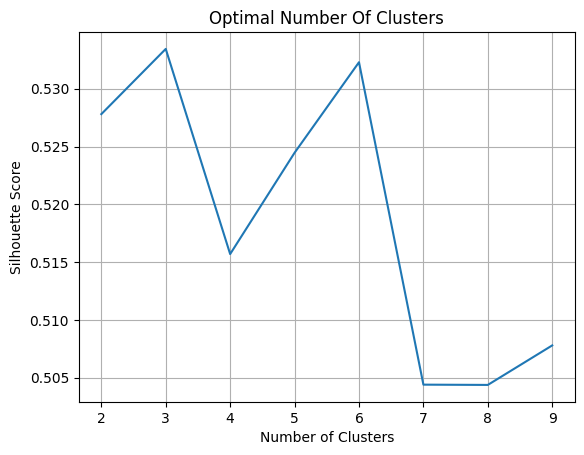

In [17]:
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number Of Clusters')
plt.grid()
plt.show()

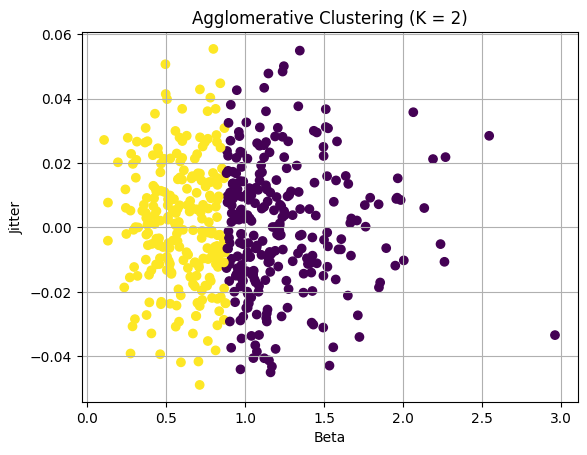

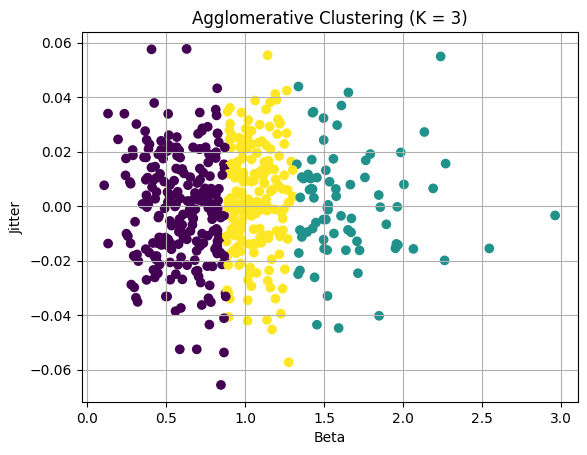

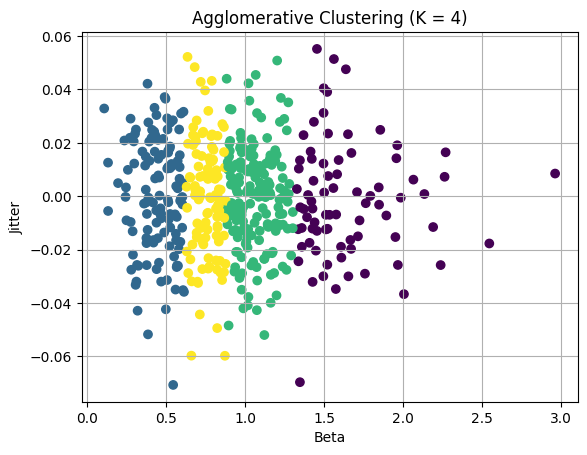

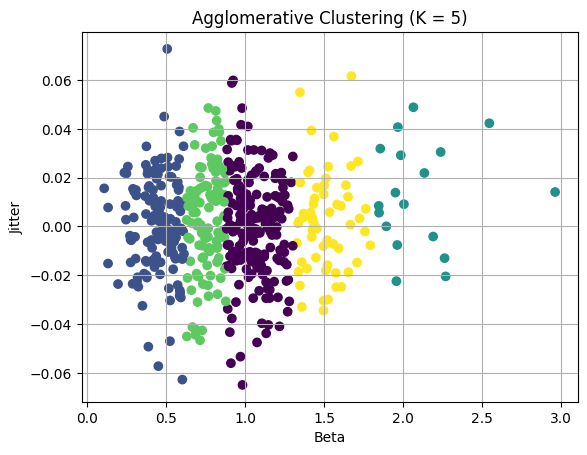

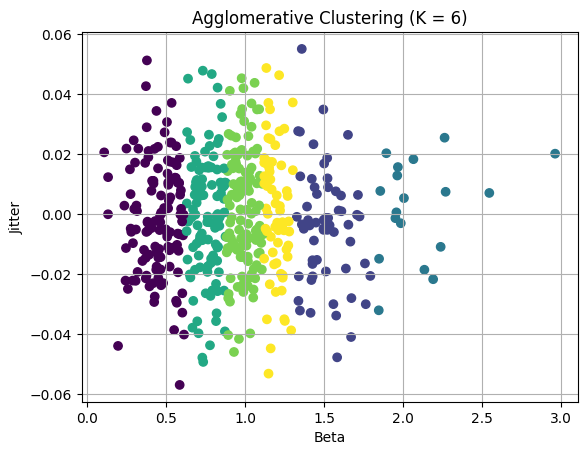

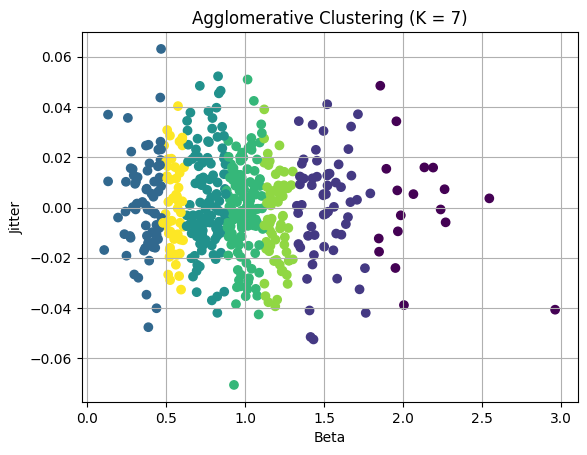

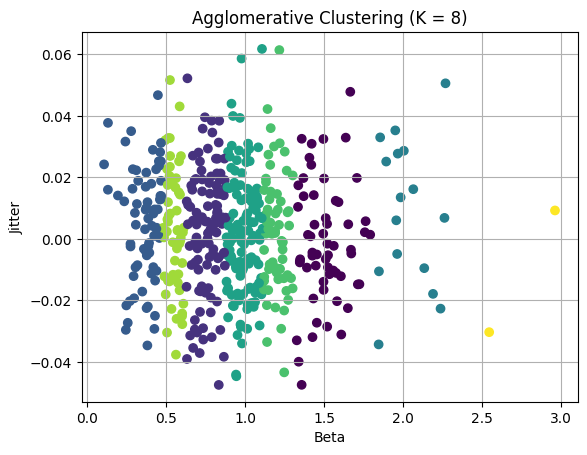

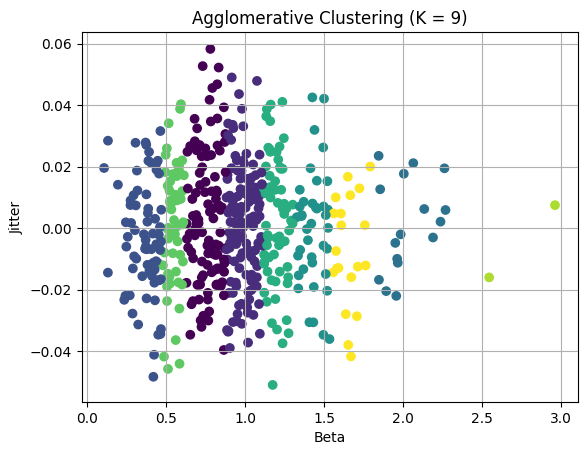

In [18]:
for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglom.fit_predict(X)

    y_jitter = np.random.normal(0, 0.02, size=len(X))
    plt.scatter(X['Beta'], y_jitter, c=labels)
    plt.xlabel('Beta')
    plt.ylabel('Jitter')
    plt.title(f'Agglomerative Clustering (K = {n_clusters})')
    plt.grid()
    plt.show()

In [19]:
best_k = range_n_clusters[scores.index(max(scores))]

cluster_model = AgglomerativeClustering(n_clusters=best_k)
labels = cluster_model.fit_predict(X)
betas_df.loc[X.index, 'Cluster'] = labels

In [20]:
#4c
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_km = betas_df[['Beta', 'AnnualVolatility']].dropna()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_km)
    inertias.append(kmeans.inertia_)

In [21]:
inertias

[38.36898695850461,
 18.775582589892146,
 12.47675194190346,
 8.316829689100732,
 6.508000667038323,
 5.5052502029436665,
 4.579925130896743,
 3.8112251607650998]

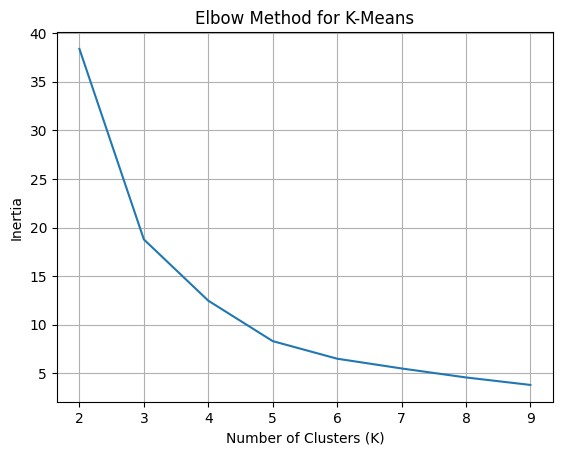

In [22]:
plt.plot(range_n_clusters, inertias)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.grid()
plt.show()

In [23]:
best_k_kmeans = 3

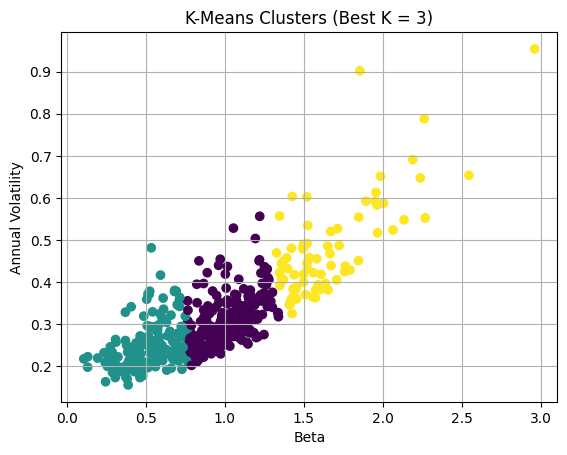

In [24]:
kmeans_model = KMeans(n_clusters=best_k_kmeans, n_init=10, random_state=42)
km_labels = kmeans_model.fit_predict(X_km)

betas_df.loc[X_km.index, 'KMeans_Cluster'] = km_labels


plt.scatter(betas_df['Beta'], betas_df['AnnualVolatility'],
            c=betas_df['KMeans_Cluster'])
plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.title(f'K-Means Clusters (Best K = {best_k_kmeans})')
plt.grid()
plt.show()

In [25]:
betas_df.columns

Index(['Stock_Name', 'Beta', 'AnnualVolatility', 'Cluster', 'KMeans_Cluster'], dtype='object')

In [26]:
daily_returns = Data_stock_price['Close'].pct_change()

#average daily return per stock
avg_daily_return = daily_returns.mean()
avg_daily_return.index.name = 'Stock_Name'
avg_daily_return = avg_daily_return.reset_index(name='DailyReturn')

#Drops old DailyReturn columns
betas_df = betas_df.drop(columns=['DailyReturn'], errors='ignore')

#Merges new DailyReturn values into betas_df
betas_df = betas_df.merge(avg_daily_return, on='Stock_Name', how='left')

betas_df.head()

,Stock_Name,Beta,AnnualVolatility,Cluster,KMeans_Cluster,DailyReturn
0,MMM,0.783737,0.295654,0.0,0.0,0.000160
1,AOS,0.924450,0.278673,2.0,0.0,-0.000047
2,ABT,0.672316,0.217839,0.0,1.0,-0.000106
3,ABBV,0.299097,0.219958,0.0,1.0,0.000610
4,ACN,1.094208,0.270331,2.0,0.0,0.000011


                DailyReturn      Beta  AnnualVolatility
KMeans_Cluster                                         
0.0                0.000403  1.012489          0.306960
1.0                0.000353  0.524284          0.247103
2.0                0.000633  1.660643          0.482094


<Figure size 1000x500 with 0 Axes>

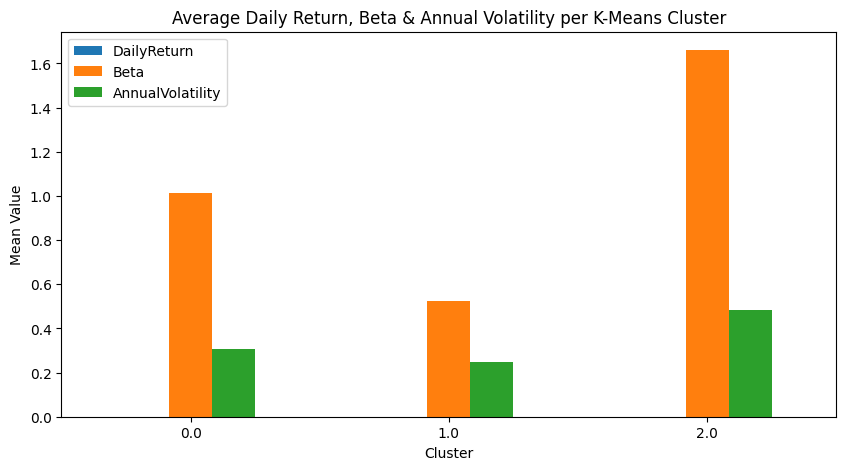

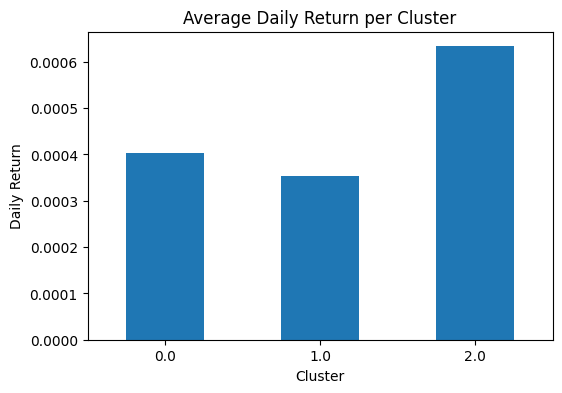

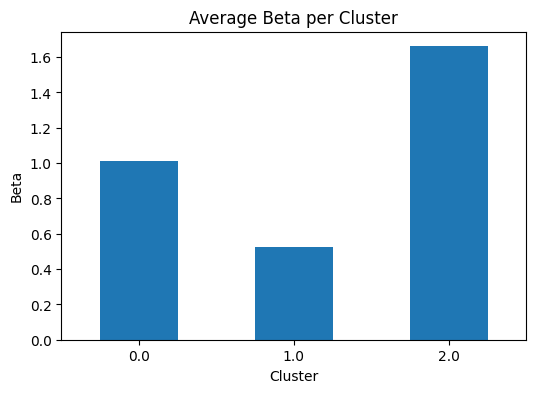

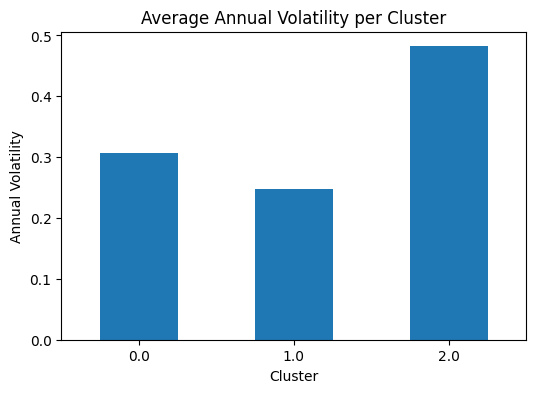

In [27]:
cluster_means = betas_df.groupby('KMeans_Cluster')[['DailyReturn',
                                                    'Beta',
                                                    'AnnualVolatility']].mean()
print(cluster_means)

#Grouped bar chart

plt.figure(figsize=(10, 5))
cluster_means.plot(kind='bar', figsize=(10, 5))
plt.title("Average Daily Return, Beta & Annual Volatility per K-Means Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.show()


#Daily Return per cluster

plt.figure(figsize=(6, 4))
cluster_means['DailyReturn'].plot(kind='bar')
plt.title("Average Daily Return per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Daily Return")
plt.xticks(rotation=0)
plt.show()


#Beta per cluster

plt.figure(figsize=(6, 4))
cluster_means['Beta'].plot(kind='bar')
plt.title("Average Beta per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Beta")
plt.xticks(rotation=0)
plt.show()

#Annual Volatility per cluster

plt.figure(figsize=(6, 4))
cluster_means['AnnualVolatility'].plot(kind='bar')
plt.title("Average Annual Volatility per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Annual Volatility")
plt.xticks(rotation=0)
plt.show()
